![alt text](https://www.mbari.org/wp-content/uploads/2014/11/logo-mbari-3b.png "MBARI")
<div align="center">Copyright (c) 2020, MBARI</div>

* Distributed under the terms of the GPL License
* Maintainer: dcline@mbari.org
* Author: Danelle Cline dcline@mbari.org

##  Prepreprocessing using PCEN

Noise removal is an essential aspect of effective sound detection and classification and noise from boats, recording equipment, or "noise" from species vocalizing in the same frequency band all interfere with classification performance.  

While we can't do much about species vocalizing in the same band, removal of noise, in particular, stationary narrow-band noise is possible using a method called Per Channel Energy Normalization (PCEN)[1]. PCEN also has other desirable properties including: a) it gaussianizes the background, and b) it can enhance the onset of a call [1][2]. In short, PCEN helps isolate sound units which is essential for both detection and classification, although here we only discuss it in the context of classification.    We have found PCEN improves performance across both supervised and unsupervised machine learning methods we have tried.  Google also found this useul in their exploration of humpback song [3]. 

 
### References
[1] https://arxiv.org/pdf/1607.05666.pdf

[2] http://www.justinsalamon.com/uploads/4/3/9/4/4394963/lostanlen_pcen_spl2018.pdf

[3] https://ai.googleblog.com/2018/10/acoustic-detection-of-humpback-whales.html

In [1]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
import librosa

# Read in a sound file

In [2]:
wav = '../call_samples/blueD/blue_D_2.wav'
info = sf.info(wav)

f = sf.SoundFile(wav) 
samples = f.read(info.frames)

# Compute the STFT

In [3]:
num_fft = 1024
overlap = 0.95

# Set high/low frequency 
low_freq = 20; high_freq = 100

# compute STFT
P = np.abs(librosa.stft(y=samples, n_fft=num_fft, window="hann", hop_length=int(num_fft*(1-overlap)))) 
freq_bin = float(P.shape[0]) / float(info.samplerate / 2)
minM = -1 * (P.shape[0] - int(low_freq * freq_bin))
maxM = -1 * (P.shape[0] - int(high_freq * freq_bin))
P = P[minM:maxM]

# PCEN 

The three main components in PCEN are:

1. Gain control
2. Temporal integraion
3. Dynamic range compression

PCEN can be implemented as a neural network layer and jointly optimized with e.g. a CNN. This is an advanced topic outside the scope of this tutorial.

For isolated sound units, gain control is the more significant factor.  You will want to experimentally determine the best settings for your data.

# Gain control

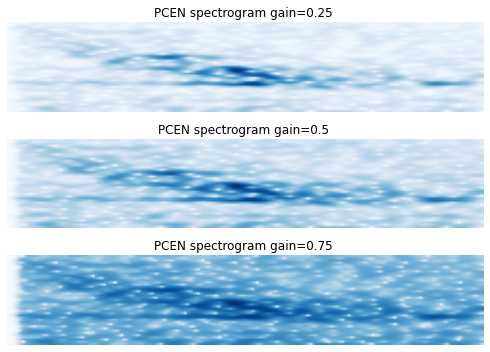

In [4]:
gain = [0.25, 0.5, 0.75]
fig = plt.figure()
width = 10
height = 5
fig.set_size_inches(width, height)
for i, g in enumerate(gain):
    D = librosa.pcen(P, gain=g, sr=info.samplerate, hop_length=round(num_fft*overlap))
    plt.subplot(3, 1, i+1)
    plt.axis('off')
    plt.imshow(np.flipud(D), interpolation='bilinear', cmap='Blues')
    plt.tight_layout() 
    plt.title(f'PCEN spectrogram gain={g} '); 